In [1]:
import pandas as pd
import numpy as np

In [8]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
dataset = pd.read_csv('u.data', names = column_names, sep='\t')

In [10]:
dataset.sample(5)

,user_id,item_id,rating,timestamp
52834,728,678,4,879442794
22668,465,477,4,883530742
42753,662,591,4,880570112
15730,92,963,5,875652981
53418,752,340,4,891208077


In [ ]:
# Let's get the title dataset

In [12]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.sample(5)

,item_id,title
421,422,Aladdin and the King of Thieves (1996)
1592,1593,Death in Brunswick (1991)
1376,1377,Hotel de Love (1996)
704,705,Singin' in the Rain (1952)
198,199,"Bridge on the River Kwai, The (1957)"


In [ ]:
# let's merge the datasets

In [14]:
df = pd.merge(dataset, movie_titles, on='item_id')
df.sample(5)

,user_id,item_id,rating,timestamp,title
8563,643,100,5,891445140,Fargo (1996)
19057,529,307,5,882534996,"Devil's Advocate, The (1997)"
11069,408,288,4,889679791,Scream (1996)
2836,889,257,4,880176845,Men in Black (1997)
56818,409,22,2,881108077,Braveheart (1995)


In [ ]:
# EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('white')
%matplotlib inline

In [ ]:
# movie titles sorted by avetage rating

In [18]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [ ]:
# movie titles sorted by number of time rated

In [21]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [ ]:
# creating a new dataframe with mean rating for each movie

In [23]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
# we can add the number of rating column to the new dataset frame

In [24]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(10)

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [ ]:
# using the histogram we can visualize our ratings dataset

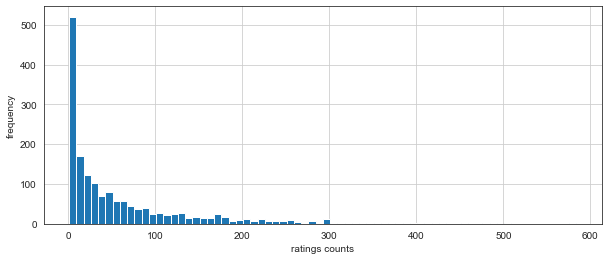

In [29]:
plt.figure(figsize=(10,4))
ratings['number of ratings'].hist(bins = 70)
plt.xlabel('ratings counts')
plt.ylabel('frequency')
plt.show();

In [ ]:
# histogram for avetage ratings

plt.figure(figsize = (1))